# Exercícios da página:
https://lectures.quantecon.org/py/python_by_example.html

# Exercise 1:  
Write a function factorial such that factorial(n) returns n! for any positive integer n

In [78]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [88]:
# primeiro da manrira mais tradicional:

def factorial(n):     
    if n ==0:
        return 1
    else:
        x = 1 
        for i in range(1,n+1):
            x = x*i
        return x

teste = 20
factorial(teste) == math.factorial(teste)

True

In [104]:
# agora de forma recursiva:

def factorial(n):     
    if n ==0:
        return 1
    else:
        return n * factorial(n-1)

teste = 20
factorial(teste) == math.factorial(teste)

True

# Exercise 2:  
 The binomial random variable Y∼Bin(n,p) represents the number of successes in n binary trials, where each trial succeeds with probability p  
  
Without any import besides from numpy.random import uniform, write a function binomial_rv such that binomial_rv(n, p) generates one draw of Y  
  
Hint: If U is uniform on (0,1) and p∈(0,1), then the expression U < p evaluates to True with probability p

In [105]:
from numpy.random import uniform

In [298]:
# primeiro da manrira mais tradicional:

def binomial_rv(n, p):
    count = 0
    for i in range(n):
        U = uniform()
        if U < p:
            count += 1
    return count

binomial_rv(10, 0.5)

6

In [249]:
# agora usando list comprehension:

def binomial_rv(n, p):
    x = [uniform() < p for i in range(n)]
    return sum(x)

binomial_rv(10, 0.3)

7

# Extra: criar um gráfico com a distribuição tendendo a uma N(np,np(1-p))

In [180]:
import matplotlib.pyplot as plt

def binomial_plot(n, p,rep):
    '''retorna duas listas com o número de sucessos em rep repetições de um experimento de bernoulli(n,p) e sua 
    probabilidade, respectivamente'''
    
    # guarda em um dicionário a frequência do número sucessos para cada repetição
    d = {}
    for i in range(rep):
        n_sucessos = binomial_rv(n, p)
        if n_sucessos not in d:
            d[n_sucessos] = 1
        else:
            d[n_sucessos] += 1
    lista = sorted(d.items())    # items() transforma em tuplas e sorted() transforma coloca em uma lista ordenada
    
    # calcula a probabilidade com base na freqência e separa as tuplas em duas listas
    x=[]
    y=[]
    for j in range(len(d)):
        x.append(lista[j][0])
        y.append(lista[j][1]/rep)
    
    return x,y

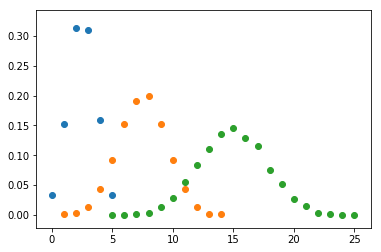

In [217]:
import matplotlib.mlab as mlab

x1,y1 = binomial_plot(5, 0.5,10000)
x2,y2 = binomial_plot(10, 0.5,10000)
x3,y3 = binomial_plot(15, 0.5,10000)
x4,y4 = binomial_plot(30, 0.5,10000)
x5,y5 = binomial_plot(50, 0.5,10000)
x6,y6 = binomial_plot(60, 0.5,10000)

plt.scatter(x1,y1)
# plt.scatter(x2,y2)
plt.scatter(x3,y3)
plt.scatter(x4,y4)
# plt.scatter(x5,y5)
# plt.scatter(x6,y6)
plt.show()

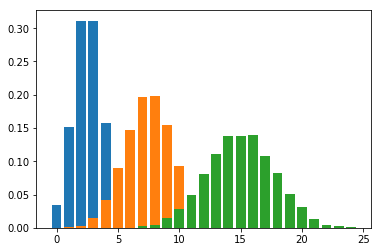

In [271]:
x1,y1 = binomial_plot(5, 0.5,10000)
# x2,y2 = binomial_plot(10, 0.5,10000)
x3,y3 = binomial_plot(15, 0.5,10000)
x4,y4 = binomial_plot(30, 0.5,10000)
# x5,y5 = binomial_plot(50, 0.5,10000)
# x6,y6 = binomial_plot(60, 0.5,10000)

plt.bar(x1,y1)
# plt.scatter(x2,y2)
plt.bar(x3,y3)
plt.bar(x4,y4)
# plt.scatter(x5,y5)
# plt.scatter(x6,y6)
plt.show()

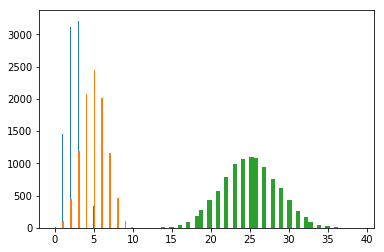

In [283]:
# também posso ser mais eficiente e usar o pacote plt.hist(): 

n_1 = 5
n_2 = 10
n_3 = 50
p,repeticoes = 0.5,10000

lista_1 = [binomial_rv(n_1, p) for rep in range(repeticoes)]
lista_2 = [binomial_rv(n_2, p) for rep in range(repeticoes)]
lista_3 = [binomial_rv(n_3, p) for rep in range(repeticoes)]
plt.hist(lista_1,50)
plt.hist(lista_2,50)
plt.hist(lista_3,50)
plt.show()

# Exercise 3:  

Compute an approximation to π using Monte Carlo. Use no imports besides  

import numpy as np  
  
Your hints are as follows:
  
If U is a bivariate uniform random variable on the unit square (0,1)2, then the probability that U lies in a subset B of (0,1)2 is equal to the area of B  

If U1,…,Un are iid copies of U, then, as n gets large, the fraction that fall in B converges to the probability of landing in B
  
For a circle, area = pi * radius^2

In [312]:
import numpy as np

# sabemos que π = A/(r**2)
# pelo enunciado, sabemos que A pode ser aproximado usando um circulo inscrito de raio r = 1/2
# os pontos que estão dentro do circulo sao os pares (x,y) tal que (x - a)2 + (y - b)2 < r2

n = 10000
r = 1/2

s = [(np.random.uniform() - 0.5)**2 + (np.random.uniform() - 0.5)**2 < r**2 for i in range(n)]
A = sum(s)/n

print(A/(r**2))

3.1436


# Exercise 4:  

Write a program that prints one realization of the following random device:  
-  Flip an unbiased coin 10 times  
-  If 3 consecutive heads occur one or more times within this sequence, pay one dollar  
-  If not, pay nothing  

Use no import besides from numpy.random import uniform

In [387]:
from numpy.random import uniform

payoff = "pay nothing"
count = 0

for i in range(10):
    U = uniform()
    count = count + 1 if U < 0.5 else 0        
    if count == 3:
        payoff = "pay one dollar"
    
print(payoff)

pay one dollar


# Exercise 5:  

Your next task is to simulate and plot the correlated time series  

$ x_{t+1} = \alpha x_t + ε_{t+1}$ where $x_0 = 0$ and $t = 0,…,T$

The sequence of shocks $\{ε_t\}$ is assumed to be iid and standard normal  

In your solution, restrict your import statements to:

import numpy as np  
import matplotlib.pyplot as plt  

Set $T = 200$ and $\alpha = 0.9$

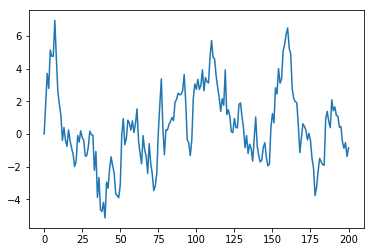

In [2]:
import numpy as np
import matplotlib.pyplot as plt

T = 200
α = 0.9

seq = [0]
for t in range(T):
    ϵ = np.random.randn()
    x = α * seq[-1] + ϵ
    seq.append(x)

plt.plot(seq)
plt.show()

# Exercise 6:  

Now, starting with your solution to exercise 5, plot three simulated time series, one for each of the cases α=0, α=0.8 and α=0.98  
  
Use a for loop to step through the α values  
  
Important hints:

-  If you call the plot() function multiple times before calling show(), all of the lines you produce will end up on the same figure

    -  And if you omit the argument 'b-' to the plot function, Matplotlib will automatically select different colors for each line
  
-  The expression 'foo' + str(42) evaluates to 'foo42'

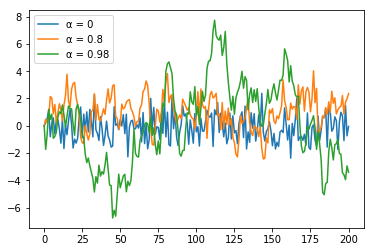

In [17]:
import numpy as np
import matplotlib.pyplot as plt

T = 200
αs = [0,0.8,0.98]

for α in αs:
    seq = [0]
    for t in range(T):
        ϵ = np.random.randn()
        x = α * seq[-1] + ϵ
        seq.append(x)
    var = np.var(seq)
    label = f'α = {α}'
    plt.plot(seq, label=label)

plt.legend()
plt.show()